# Exploring AirBnB in Athens

A lot has been said and written about the effect of AirBnB in Athens. In this assignment, you will use the data collected by [Inside AirBnB](http://insideairbnb.com), so you can go ahead and download the Athens data from http://insideairbnb.com/get-the-data.html.

Once you do that, spend some time familiarizing yourself with the data and then go ahead and do the following tasks.

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from datetime import datetime

# Reading the data
current_path = os.getcwd()
location_of_files = os.getcwd() + '/data'
csv_files = [f for f in os.listdir(location_of_files) if f.endswith('.csv')]
calendar = pd.read_csv(location_of_files + '/' + 'calendar.csv')
listings = pd.read_csv(location_of_files + '/' + 'listings.csv')
reviews = pd.read_csv(location_of_files + '/' + 'reviews.csv')

## Neighbourhood Listings in Descending Order

Show the listings per neighbourghood, with the most popular neighbourhoods first (that is, in decreasing neighbourhood popularity order).

<b><font color='blue'>Answer</font></b>
- 
Since each **listing_id** in the listings table has a **neighbourhood** the requested listings selection is fairly simple, since we only have to group by the neighbourhood column, apply the count aggragation function and then sort the selection by the listngs count in descending order

In [2]:
# Group by 'neighborhood' and count the listings in each neighborhood
neighborhood_counts = listings.groupby('neighbourhood').count().reset_index()

# Rename the count column to 'listings_count' if needed
neighborhood_counts.rename(columns={'id': 'listings_count'}, inplace=True)

neighborhood_counts[['neighbourhood', 'listings_count']].sort_values(by='listings_count', ascending=False)

,neighbourhood,listings_count
15,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,2416
23,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,1122
28,ΝΕΟΣ ΚΟΣΜΟΣ,980
26,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,979
2,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,817
36,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,583
30,ΠΑΓΚΡΑΤΙ,511
6,ΑΜΠΕΛΟΚΗΠΟΙ,452
21,ΚΟΛΩΝΑΚΙ,425
5,ΑΚΡΟΠΟΛΗ,386


## Neighbourhood Prices in Descending Order

Create a table with the prices per neighbourhood. The prices information should contain:

* median price per neighbourhood

* mean price per neighbourhood

* standard deviation per neighbourhood

* number of listings per neighbourhood.

The contents of the table should be in descending median prices.

### <b><font color='blue'>Answer</font></b>


- First we setup a dictionary pinpointing which function(s) should be applied to each column.
- Then, we continue by grouping the listings using the group by function on the neihbourhood field and we applying the requested aggregation functions.
- Finally, for better understanding of the results, we rename the constucted columns and we display the result

In [3]:
# Define aggregation functions

agg_functions = {
    'price': ['median', 'mean', 'std'],
    'id': 'count'
}

# Group by 'Neighborhood' and apply the aggregation functions
neighbourhoud_ranking = listings.groupby('neighbourhood').agg(agg_functions)

# Rename the columns for clarity
neighbourhoud_ranking = neighbourhoud_ranking.rename(columns={'median': 'median_price',
                                'mean': 'mean_price',
                                'std': 'std_dev_price',
                                'count': 'no_of_listings'})

neighbourhoud_ranking = neighbourhoud_ranking.sort_values(by=('price',   'median_price'), ascending = False)
display(neighbourhoud_ranking)

price                            \
                                 median_price  mean_price std_dev_price   
neighbourhood                                                             
ΡΗΓΙΛΛΗΣ                                120.0  367.800000    578.622675   
ΖΑΠΠΕΙΟ                                 114.0  224.068323    641.163173   
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ                  104.0  140.650662    229.183015   
ΑΚΡΟΠΟΛΗ                                100.0  195.344560    703.321565   
ΚΟΛΩΝΑΚΙ                                100.0  128.595294    104.431349   
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                      90.5  120.284314    104.613533   
ΘΗΣΕΙΟ                                   90.0  126.492228    124.176775   
ΚΕΡΑΜΕΙΚΟΣ                               89.0  123.883382    136.367487   
ΛΥΚΑΒΗΤΤΟΣ                               75.0  104.561728     87.859850   
ΓΚΑΖΙ                                    70.5   95.792453     75.355882   
ΣΤΑΔΙΟ                                   70.0  121.515873    509.991840   
ΙΛΙΣΙΑ                                   70.0   87.189815     53.519013   
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ                 67.0  169.259448   2563.621548   
ΝΕΟΣ ΚΟΣΜΟΣ                              67.0   94.586735    127.407374   
ΠΑΓΚΡΑΤΙ                                 67.0   84.062622     92.218241   
ΠΕΤΡΑΛΩΝΑ                                66.5  104.701705    285.518630   
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                           61.0   98.818182     92.281191   
ΕΛΛΗΝΟΡΩΣΩΝ                              60.0   81.589041     72.727390   
ΒΟΤΑΝΙΚΟΣ                                60.0   78.200000     48.042281   
ΓΟΥΒΑ                                    58.0   72.240000     83.506245   
ΑΜΠΕΛΟΚΗΠΟΙ                              58.0   66.915929     39.297399   
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ         58.0   78.155447     73.453460   
ΓΟΥΔΙ                                    58.0   68.952174     37.039603   
ΠΡΟΜΠΟΝΑ                                 57.0   60.833333     27.511430   
ΠΕΔΙΟ ΑΡΕΩΣ                              56.0  148.137615    761.697707   
ΣΕΠΟΛΙΑ                                  55.0   77.422222    150.067332   
ΝΕΑ ΚΥΨΕΛΗ                               50.0   56.453125     28.871873   
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                          50.0   61.564706     58.615870   
ΚΥΨΕΛΗ                                   50.0   62.656827     58.884856   
ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ                        50.0   79.934211    163.926596   
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                          48.0   64.116638     74.498484   
ΑΝΩ ΠΑΤΗΣΙΑ                              48.0   56.078125     29.493774   
ΚΟΛΩΝΟΣ                                  47.0   51.888889     21.263955   
ΠΕΝΤΑΓΩΝΟ                                46.0   46.000000      1.414214   
ΠΑΤΗΣΙΑ                                  45.0   60.524096    117.601314   
ΠΟΛΥΓΩΝΟ                                 45.0   54.310345     26.467100   
ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ                           45.0   53.202020     32.861484   
ΓΚΥΖΗ                                    44.5   52.033898     42.301913   
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                         44.0   52.500000     37.479603   
ΡΙΖΟΥΠΟΛΗ                                44.0   52.538462     22.096815   
ΚΟΛΟΚΥΝΘΟΥ                               43.0   43.937500      9.532182   
ΝΙΡΒΑΝΑ                                  42.0   53.045977     39.449070   
ΑΝΩ ΚΥΨΕΛΗ                               42.0   45.932773     23.316078   
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                         41.5   43.736842     17.408734   

                                             id  
                                 no_of_listings  
neighbourhood                                    
ΡΗΓΙΛΛΗΣ                                      5  
ΖΑΠΠΕΙΟ                                     161  
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ                     2416  
ΑΚΡΟΠΟΛΗ                                    386  
ΚΟΛΩΝΑΚΙ                                    425  
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                        1122  
ΘΗΣΕΙΟ                                      386  
ΚΕΡΑΜΕΙΚΟΣ    

## Availability per Day

Create a plot with the number of listings available per day, on the $y$ axis, and the date, on the $x$ axis.

### <b><font color='blue'>Answer</font></b>


- In order to find the number of available listings per date, we first need to select all available ones. As shown below the 2 possible values of the 'available' are t and f.


Therefore we make a subselection where the **available** equals **'t'**, apply a group by the **date** field and finally count the results.

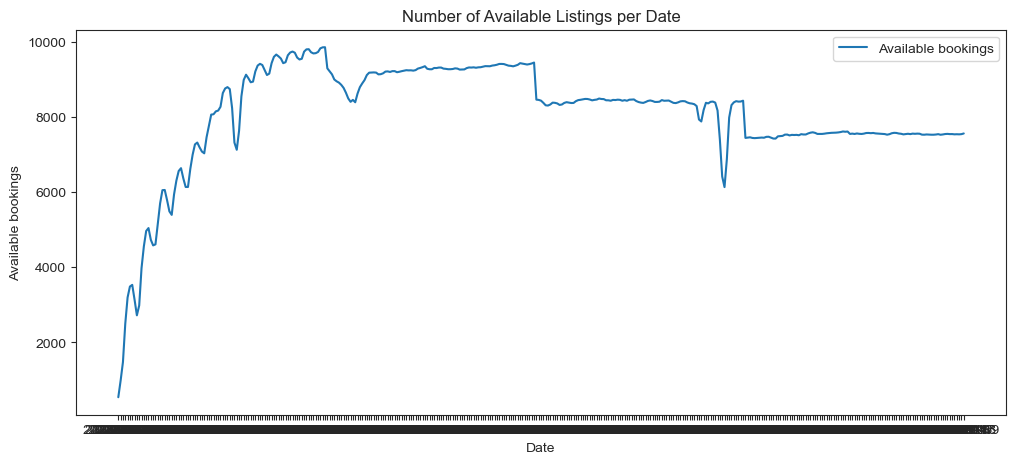

In [4]:
av_listings = calendar[calendar['available'] == 't'].groupby('date').count().reset_index()
# set figure size 
plt.figure( figsize = ( 12, 5)) 
  
# plot a simple time series plot 
# using seaborn.lineplot()
sns.set_style("ticks")
sns.lineplot( x = 'date', 
             y = 'available', 
             data = av_listings, 
             label = 'Available bookings') 
  
plt.xlabel( 'September 2023 - September 2024') 
  
plt.xlabel('Date')
plt.ylabel('Listings Available')
plt.title('Number of Available Listings per Date')
_ = plt.ylabel('Available bookings')

## Reviews, Occupacy per Listing, Average Income

Create a histogram showing the number of reviews per listing. The histogram should bin the number of reviews, from the smallest amount of reviews in a listing, to the maximum number of reviews in a listing rounded up to the closest hundred.

Once you have done that, calculate the average occupacy per listing per month. To calculate that, find the average reviews per month and assume that half of the bookings result in reviews.

Then, assuming that each booking is for a three nights stay, calculate the average income per month, using the average price charged throughout all listings.

## Histogram showing the number of reviews per listing

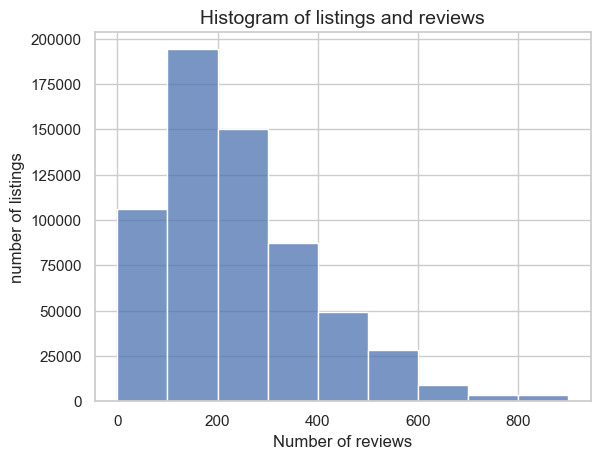

In [5]:
def closest_hundred(number):
    # Divide the number by 100 and round to the nearest integer
    nearest_hundred = round(number / 100) * 100
    return nearest_hundred

# Group by 'listing_id' and calculate the total reviews for each listing
reviews['total_reviews'] = reviews.groupby('listing_id')['date'].transform('count')

reviews['close_hundred'] = reviews['total_reviews'].apply(closest_hundred)

# Set a more aesthetically pleasing Seaborn style
sns.set(style="whitegrid")

# Create a histogram with wider bins (binwidth = 100)
ax = sns.histplot(data=reviews, x="close_hundred", binwidth=100)

# Customize the appearance
ax.set_xlabel('Number of reviews', fontsize=12)
ax.set_ylabel('number of listings', fontsize=12)
ax.set_title('Histogram of listings and reviews', fontsize=14)

plt.show()

## Calculation of average occupacy per listing per month.

 To calculate that, find the average reviews per month and assume that half of the bookings result in reviews.


Then, assuming that each booking is for a three nights stay, calculate the average income per month, using the average price charged throughout all listings.

### <b><font color='blue'>Answer</font></b>


- First we need to find the month that each datetime belongs to, so that we can then group by the listings, by the listing_id and month

In [6]:
# First, make sure the 'date' column is in datetime format
reviews['date'] = pd.to_datetime(reviews['date'])

# Then, group by the month and year of the 'date' column and count the reviews
reviews['month'] = reviews['date'].dt.strftime('%B')

grouped_data = reviews.groupby(['listing_id', 'month']).size().reset_index(name='count')
grouped_data

,listing_id,month,count
0,10595,April,3
1,10595,August,3
2,10595,December,2
3,10595,February,4
4,10595,January,3
...,...,...,...
80093,975413215364080586,September,4
80094,975966554881091774,September,1
80095,976076532701121190,September,1
80096,977373669051180593,September,2


### <b><font color='blue'>Answer</font></b>

- In order to find the average price, we are going to calculate the average price per listing per month.
- By doing so, we can then match the time of the review with the average price of the month.

In [7]:
# Remove the dollar sign and convert 'price' to numeric
calendar['price'] = pd.to_numeric(calendar['price'].str.replace('$', '').str.replace(',', ''), errors='coerce')

# Convert the 'date' column to datetime format if it's not already
calendar['date'] = pd.to_datetime(calendar['date'])

# Create a new "month_name" column in the 'calendar' DataFrame
calendar['month'] = calendar['date'].dt.strftime('%B')

# Group the DataFrame by 'listing_id' and 'month_name' and calculate the average price
average_price_df = calendar.groupby(['listing_id', 'month'])['price'].mean().reset_index()

# Rename the 'price' column to 'average_price' if needed
average_price_df.rename(columns={'price': 'average_price'}, inplace=True)

reviews_merge_on_average_price = grouped_data.merge(average_price_df, on=['listing_id', 'month'])

display(reviews_merge_on_average_price)

KeyboardInterrupt: 

- By assuming that half of the bookings result in reviews, we calculate the estimated_bookings_column

In [ ]:
bookings_multiplier = 2
no_of_nights = 3
reviews_merge_on_average_price['estimated_bookings']  = bookings_multiplier * reviews_merge_on_average_price['count']
reviews_merge_on_average_price['estimated_income_per_month']  = reviews_merge_on_average_price['average_price'] * reviews_merge_on_average_price['estimated_bookings']
display(reviews_merge_on_average_price)

## Listings per Room Type

Show the number of listings per room type, in absolute numbers, and also in percentages (the percentage of listings for each particular room type). Then, show the number of listings per neighrbourhood and room type.

### Number of listings per room type, in absolute numbers, and also in percentages

In [ ]:
reviews_n_listings = reviews.merge(listings, left_on='listing_id', right_on='id')

In [ ]:
# Group by 'room_type' and count the occurrences
room_type_counts = reviews_n_listings['room_type'].value_counts()

# Calculate the percentage for each room type
total_count = len(reviews_n_listings)
room_type_counts_percentage = room_type_counts / total_count * 100

# Create a DataFrame to hold the results
result_df = pd.DataFrame({'count': room_type_counts, 'percentage': room_type_counts_percentage})

# Display the result
display(result_df)

### Number of listings per neighrbourhood and room type in absolute numbers

In [ ]:
# Create a pivot table
pivot_table = pd.pivot_table(reviews_n_listings, values='listing_id', index='neighbourhood', columns='room_type', aggfunc='count')

# Calculate the percentage for each room type in each neighborhood
total_count = pivot_table.sum(axis=1)
pivot_table_percentage = pivot_table.div(total_count, axis=0) * 100

# Calculate the total count for all room types in each neighborhood
pivot_table['Total'] = pivot_table.sum(axis=1)

# Replace NaN values with 0
pivot_table.fillna(0, inplace=True)
pivot_table_percentage.fillna(0, inplace=True)

# Display the result
display(pivot_table.round())

### Number of listings per neighrbourhood and room type in percentages

In [ ]:
display(pivot_table_percentage.round())

## Prices per Day

Create a table with the average price per listing per day. Draw a graph visualizing the table.

### <b><font color='blue'>Answer</font></b>

To solve this problem, based all the available data we are going to calculate the average price **per day**, **per listing**. 

To do this first we convert the date column from string to datetime. Doing so, we can extract the day name, which we save on the **day** field. Additionally we only  keep the values falling in the 1st and 3rd quartile

In [ ]:
calendar_with_dates = calendar

# Convert the 'date' column to datetime
calendar_with_dates['date'] = pd.to_datetime(calendar_with_dates['date'])

# Extract the day of the week
calendar_with_dates['day'] = calendar_with_dates['date'].dt.day_name()

# Assuming you have a DataFrame named 'calendar'
q1 = calendar_with_dates['price'].quantile(0.25)
q3 = calendar_with_dates['price'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
iqr = q3 - q1

# Define a lower bound and upper bound for outlier detection
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter the DataFrame to remove outliers
calendar_with_dates = calendar_with_dates[(calendar_with_dates['price'] >= lower_bound) & (calendar_with_dates['price'] <= upper_bound)]

#### Answer:
Moving on, we group by the combination of fields listing_id and day, And from there we keep the mean value. Finally we apply a pivot to the dataframe, so that the results are more explainable.

In [ ]:
# Group by 'listing_id' and 'day_of_week', calculate the average price
result = calendar_with_dates.groupby(['listing_id', 'day'])['price'].mean().reset_index()

# Pivot the DataFrame
pivot_df = result.pivot(index='listing_id', columns='day', values='price')

# Round the prices in the pivot_df DataFrame to 2 decimal places
result = result.round()
pivot_df = pivot_df.round()

display(pivot_df)
display(result)

## Graph visualizing the table

### <b><font color='blue'>Answer</font></b>


In [ ]:
merged_data = pd.merge(calendar_with_dates, listings[['id', 'latitude', 'longitude', 'neighbourhood']], left_on='listing_id', right_on='id')

sns.catplot(
    data=merged_data, kind="bar",
    x="day", y="price", col="neighbourhood",
    height=5, aspect=.5,col_wrap=5,  # Adjust this value as needed
    width=2)
plt.show()

In [ ]:
sns.set_style("ticks")

# Convert the 'date' column to datetime if it's not already in datetime format
# calendar_with_dates['date'] = pd.to_datetime(calendar_with_dates['date'])

# Create a new figure for the line plot
plt.figure(figsize=(15, 6))

# Get a list of unique neighborhoods
neighborhoods = merged_data['neighbourhood'].unique()

# Set a specific color palette for good contrast
palette = sns.color_palette("Set1", n_colors=len(merged_data))

# Create a color mapping dictionary to assign a unique color to each neighborhood
color_mapping = {neighbourhood: palette[i % len(palette)] for i, neighbourhood in enumerate(neighborhoods)}

# Iterate through the neighborhoods and plot each neighborhood's data with a unique color
for neighborhood in neighborhoods:
    one_neighborhood = merged_data[merged_data['neighbourhood'] == neighborhood]
    average_price_per_date = one_neighborhood.groupby('date')['price'].mean().reset_index()

    plt.plot(average_price_per_date['date'], average_price_per_date['price'], label=neighborhood, color=color_mapping[neighborhood], alpha=0.4)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Over Time for each neighborhood')
plt.grid(True)

# Adjust the position of the legend below the graph and center it in two columns
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4, title='Average Price per Neighborhood 2023-2024')

plt.show()

## Listings per Host

Create a table with the number of listings per host, in descending order. Create a graph that will show the distribution of listings per host, as follows:

* You will rank the host on a number of listings basis. So, the first host will be the one with the largest number of listings, the second host will be the one with the second largest number of listings, etc. If there is a number of hosts with the same listings, just add them in sequence. For instance, if there are 10 hosts with one listing each, add them in the ranking with any order between them.

* On the $y$ axis you will have the number of listings.

That is, a point $(x, y)$ will mean that the $x$-th highest hosting host has $y$ listings.

After you have drawn the plot, do another one, this time with the $x$ axis in *logarithmic* scale.

## Group and Count Listings by Host

**Step 1:** Group the DataFrame 'listings' by the 'host_id' column. This operation aggregates the data, counting the number of listings associated with each unique 'host_id'. The result is stored in the 'host_counts' DataFrame.

```python
host_counts = listings.groupby('host_id').count().reset_index()

In [ ]:
# Group by 'neighborhood' and count the listings in each neighborhood
host_counts = listings.groupby('host_id').count().reset_index()

# Rename the count column to 'listings_count' if needed
host_counts.rename(columns={'id': 'listings_count'}, inplace=True)

host_listing_counts = host_counts[['listings_count', 'host_id', 'host_name']].sort_values(by='listings_count', ascending=False)

In [ ]:
# Group by 'host_id' and aggregate the data
host_counts = listings.groupby(['host_id', 'host_name']).size().reset_index(name='listings_count')

# Sort the DataFrame by 'listings_count' in descending order
host_listing_counts = host_counts.sort_values(by='listings_count', ascending=False)

# Reset the index to start from 0
host_listing_counts.reset_index(drop=True, inplace=True)

# Print the resulting DataFrame
display(host_listing_counts)


In [ ]:
# Calculate the rank based on listings_count
host_listing_counts['host_rank'] = host_listing_counts['listings_count'].rank(ascending=False, method='min')

# Sort the DataFrame by listings_count in descending order
host_listing_counts = host_listing_counts.sort_values(by='listings_count', ascending=False)

# Reset the index to start from 1
host_listing_counts.reset_index(drop=True, inplace=True)

display(host_listing_counts[0:50])

In [ ]:
sns.displot(host_listing_counts, x="listings_count", binwidth=13)


## Visualize Listings

Draw an interactive map to show the listings ovelayed on Athens.

You can use the [folium](https://github.com/python-visualization/folium) library to create your map; spend some time reading the documentation.

The map should show each listing and on clicking on top of it, the user should see a short description of the listing.

Note that such a map is heavy on resources. You will probably *not* be able to include it in a Jupyter notebook, so you should save it to an external HTML file that can be opened by any browser. Also, to make things easier, you make wish to limit the maximum zoom level from 12 to 15 (after you read folium's documentation you will know what this is).

Hint: be careful witht he description data, if they contain some characters they may not be rendered in HTML and may destroy your output.

In [ ]:
import folium
import pandas as pd

# Create a map centered around the mean latitude and longitude of listings
m = folium.Map(location=[listings['latitude'].mean(), listings['longitude'].mean()], zoom_start=12)

# Define a function to add markers for each listing
def add_listing_marker(row):
    color = '#FF5733'  # Replace with the color you prefer for each neighbourhood
    opacity = 0.5  # 50% transparency

    description = f'<b>{row["name"]}</b><br>{row["neighbourhood"]}'
    
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        tooltip=row['name'],
        popup=folium.Popup(description, max_width=200),
        icon=folium.Icon(color=color, opacity=opacity)
    ).add_to(m)

# Apply the function to each row in the DataFrame
listings.apply(add_listing_marker, axis=1)


# Display the map
m.save('listings_map.html')  # Save the map to an HTML file
folium.TileLayer('cartodbpositron').add_to(m)
m

## Submission Instructions

You must submit your assignment as a Jupyter notebook that will contain the full code and documentation of how you solved the questions, plus the HTML file containing the visualization of the last question. The Jupyter notebook must be fully replicable: that is, somebody reading it must be able to do exactly what you did and obtain the same results.

The documentation must be at the level where somebody that has some Pandas and Python knowledge can understand exactly what you are doing and why. Your output must be as user-friendly as possible. That means that your output tables should not include zillions of columns that are not needed for your analysis.

## Honor Code

You understand that this is an individual assignment, and as such you must carry it out alone. You may seek help on the Internet, by Googling or searching in StackOverflow for general questions pertaining to the use of Python and pandas libraries and idioms. However, it is not right to ask direct questions that relate to the assignment and where people will actually solve your problem by answering them. You may discuss with your colleagues in order to better understand the questions, if they are not clear enough, but you should not ask them to share their answers with you, or to help you by giving specific advice.